In [1]:
import yaml
import matplotlib.pyplot as plt
from lvmsurveysim import IFU, Telescope
from lvmsurveysim.schedule import ObservingPlan, Simulator, TileDB, OpsDB
from lvmsurveysim.target import TargetList
from lvmsurveysim.target import Target
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.visualization import PercentileInterval, SqrtStretch, ImageNormalize

In [2]:
with open('./smc.yaml', 'r') as f:
    tgt = yaml.safe_load(f)
tgt

{'SMC': {'coords': [13.1583, -72.8003],
  'region_type': 'ellipse',
  'frame': 'icrs',
  'region_params': {'a': 3.0, 'b': 1.78, 'pa': 45},
  'priority': 30,
  'observatory': 'LCO',
  'telescope': 'LVM-160',
  'max_airmass': 1.75,
  'min_shadowheight': 1.0,
  'exptime': 1200,
  'n_exposures': 9,
  'min_exposures': 3,
  'min_moon_dist': 45,
  'max_lunation': 0.25,
  'overhead': 1.1,
  'tiling_strategy': 'center_first',
  'tile_overlap': 0.0416,
  'group': ['MCs']}}

In [3]:
targets = TargetList(target_file='./smc.yaml')
OpsDB.init()
print('Tiling Survey ...')
tiledb = TileDB(targets)
tiledb.tile_targets()
OpsDB.create_tables(drop=True)
OpsDB.save_tiledb(tiledb, fits=True, path='smc_tiles', overwrite=True)

Tiling Survey ...
Tiling target SMC


108

In [4]:
tbl = tiledb.tile_table
tbl

TileID,TargetIndex,Target,Telescope,RA,DEC,PA,TargetPriority,TilePriority,AirmassLimit,LunationLimit,HzLimit,MoonDistanceLimit,TotalExptime,VisitExptime,Status
int64,int64,str3,str7,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,int64,int64
1000001,0,SMC,LVM-160,6.43766804734025,-75.16966993749213,6.424764439327347,30,1,1.75,0.25,1.0,45,10800,3600,0
1000002,0,SMC,LVM-160,9.28025146530119,-75.23404962535052,3.707811821178015,30,3,1.75,0.25,1.0,45,10800,3600,0
1000003,0,SMC,LVM-160,5.13637968718144,-74.91595632798729,7.666948160395025,30,1,1.75,0.25,1.0,45,10800,3600,0
1000004,0,SMC,LVM-160,7.927830407384575,-74.99638996382404,4.9998360163419715,30,3,1.75,0.25,1.0,45,10800,3600,0
1000005,0,SMC,LVM-160,10.742314468201258,-75.0428684358942,2.309672378710052,30,4,1.75,0.25,1.0,45,10800,3600,0
1000006,0,SMC,LVM-160,6.616853202343753,-74.7510726847016,6.251715823924972,30,3,1.75,0.25,1.0,45,10800,3600,0
1000007,0,SMC,LVM-160,9.384223244852707,-74.81373617250836,3.607370903945322,30,4,1.75,0.25,1.0,45,10800,3600,0
1000008,0,SMC,LVM-160,12.167861500249964,-74.84270994192255,0.9467446430794246,30,5,1.75,0.25,1.0,45,10800,3600,0
1000009,0,SMC,LVM-160,5.346620760101074,-74.4984508222557,7.464150239032642,30,2,1.75,0.25,1.0,45,10800,3600,0


In [5]:
ifu = IFU.from_config()
lvm160 = Telescope.from_config('LVM-160')

In [6]:
lvm160.plate_scale

<Quantity 348.42060811 arcsec / mm>

In [7]:
# Load SHASSA image
dat, hdr = fits.getdata('010.fl.fits.gz', header=True)
wcs = WCS(hdr)
print(dat.shape)

(998, 1014)


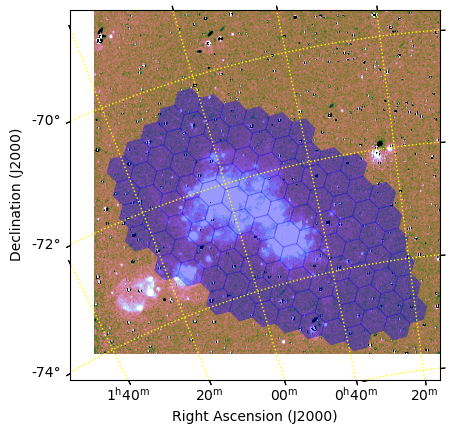

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection=wcs)
norm = ImageNormalize(dat, interval=PercentileInterval(98),
                      stretch=SqrtStretch())
ax.imshow(dat, origin='lower', cmap='cubehelix', norm=norm)
ax.coords[0].set_axislabel('Right Ascension (J2000)')
ax.coords[1].set_axislabel('Declination (J2000)')
ax.grid(color='yellow', ls=':', lw=1)
ax.set_xlim(0, 500)
ax.set_ylim(0, 500)
for p in tbl:
    patch = ifu.get_patch(scale=lvm160.plate_scale, centre=[p['RA'], p['DEC']], pa=p['PA'],
                            edgecolor='None', linewidth=0.0, alpha=0.4, facecolor='b',
                            transform=ax.get_transform('fk5'))[0]
    ax.add_patch(patch)

In [9]:
smc = Target.from_list('SMC',targets=tgt)
smc

<Target (name='SMC', telescope='LVM-160', region_type='ellipse')>

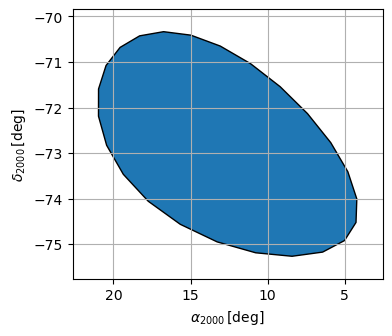

In [10]:
fig,ax=smc.plot()
fig.set_figheight(3.5)
fig.set_figwidth(4)
ax.invert_xaxis()